In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve, 
    precision_recall_curve,
    auc
)

In [18]:
# Previous task
url = "../Titanic.csv"
df = pd.read_csv(url)

df_cleaned = df.dropna()
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']

df_cleaned = df_cleaned.drop(cols_to_drop, axis=1)
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
df_cleaned['Embarked'] = df_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

initial_rows = df.shape[0]
final_rows = df_cleaned.shape[0]
data_loss_percent = ((initial_rows - final_rows) / initial_rows) * 100

X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# SVM
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_proba_svm = svm_clf.predict_proba(X_test)[:, 1]

# KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
y_proba_knn = knn_clf.predict_proba(X_test)[:, 1]


def evaluate_model(y_true, y_pred, y_proba, model_name) -> None:
    print(f"Metrics for model {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1: {f1_score(y_true, y_pred):.2f}")

    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"ROC-AUC: {roc_auc:.2f}\n")


evaluate_model(y_test, y_pred, y_proba, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, y_proba_svm, "SVM")
evaluate_model(y_test, y_pred_knn, y_proba_knn, "KNN")

Metrics for model Logistic Regression:
Accuracy: 0.73
Precision: 0.74
Recall: 0.87
F1: 0.80
ROC-AUC: 0.81

Metrics for model SVM:
Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.77
ROC-AUC: 0.73

Metrics for model KNN:
Accuracy: 0.68
Precision: 0.68
Recall: 0.91
F1: 0.78
ROC-AUC: 0.63



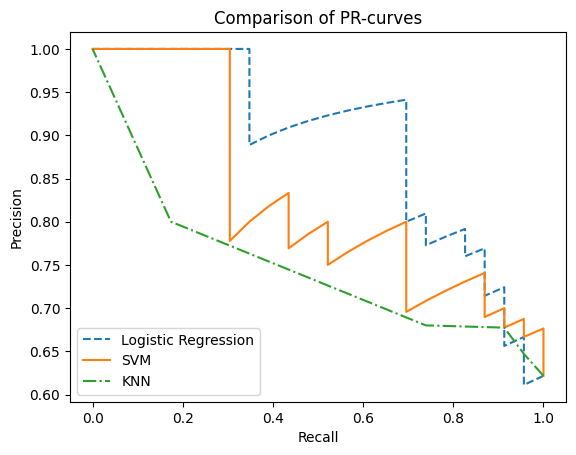

In [15]:
plt.figure()

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall_lr, precision_lr, label="Logistic Regression", linestyle="--")

precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_proba_svm)
plt.plot(recall_svm, precision_svm, label="SVM", linestyle="-")

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)
plt.plot(recall_knn, precision_knn, label="KNN", linestyle="-.")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Comparison of PR-curves")
plt.legend()
plt.show()

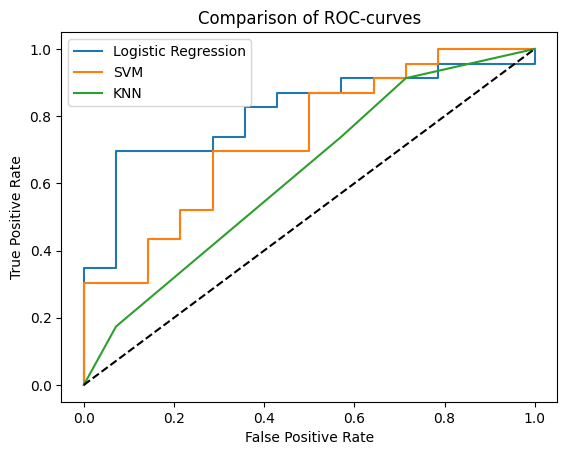

In [16]:
plt.figure()

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression')

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM')

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC-curves')
plt.legend()
plt.show()